In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
%matplotlib inline
import itertools
import seaborn as sns
from sklearn import metrics
import sklearn
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [55]:
#READING DATA USING PANDAS
dataset = pd.read_csv("audit_data/audit_data.csv")
dataset.head(5)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [56]:
##To read the total number of rows and columns
number_of_rows, number_of_columns = dataset.shape
print("Number of Rows :",number_of_rows) 
print("Number of Columns :",number_of_columns) 


Number of Rows : 776
Number of Columns : 27


In [57]:
##Describing the Data

dataset.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [58]:
##CHECKING FOR TOTAL NUMBER OF MISSING VALUES IN DATA

dataset.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

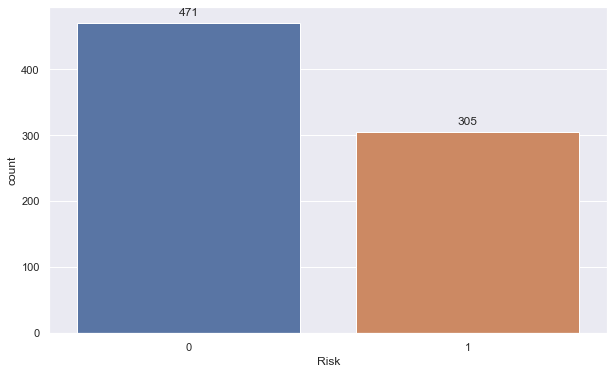

In [59]:
##Counting number of Firms as fraudulent and not fraudulent in the 27th column (RISK)
plt.figure(figsize=(10,6))

sns.set(style='darkgrid')
frequency_plot = sns.countplot(dataset['Risk'], label='Count')

##To display the number count on top of the bars plotted
for a in frequency_plot.patches:
    frequency_plot.annotate(format(a.get_height()), (a.get_x() + a.get_width() / 2., a.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.savefig("RISK_COUNT.png")

# DATA PREPROCESSING #

### HANDLING MISSING VALUES ###

In [60]:
## CHECKING MISSING VALUES
dataset.isna().sum().sort_values()

Sector_score      0
Detection_Risk    0
CONTROL_RISK      0
Inherent_Risk     0
Score             0
Risk_F            0
Prob              0
History           0
RiSk_E            0
PROB              0
District_Loss     0
Risk_D            0
Audit_Risk        0
Score_MV          0
Risk_C            0
Score_B.1         0
numbers           0
TOTAL             0
Risk_B            0
Score_B           0
PARA_B            0
Risk_A            0
Score_A           0
PARA_A            0
LOCATION_ID       0
Risk              0
Money_Value       1
dtype: int64

In [61]:
#LOCATION_ID WAS FOUND TO HAVE CATEGORICAL VALUES INSTEAD OF NUMERIC
#dataset['LOCATION_ID'].sort_values(ascending=False).head()

print (dataset['LOCATION_ID'].unique())


['23' '6' '7' '8' '13' '37' '24' '3' '4' '14' '5' '20' '19' '21' '22' '9'
 '11' '12' '29' '30' '38' '31' '2' '32' '16' '33' '15' '36' '34' '18' '25'
 '39' '27' '35' '40' '41' '42' '1' '28' 'LOHARU' 'NUH' 'SAFIDON' '43' '44'
 '17']


In [62]:
##this is to change all non-numeric values to missing values

cnt = 0
for row in dataset['LOCATION_ID']:
    try:
        int(row)
        pass
    except ValueError:
        dataset.loc[cnt,'LOCATION_ID']=np.nan
    cnt+=1

In [63]:
print (dataset['LOCATION_ID'].unique())

['23' '6' '7' '8' '13' '37' '24' '3' '4' '14' '5' '20' '19' '21' '22' '9'
 '11' '12' '29' '30' '38' '31' '2' '32' '16' '33' '15' '36' '34' '18' '25'
 '39' '27' '35' '40' '41' '42' '1' '28' nan '43' '44' '17']


In [64]:
## RE-CHECKING MISSING VALUES
dataset.isna().sum().sort_values().sort_values(ascending=False)

LOCATION_ID       3
Money_Value       1
Audit_Risk        0
Detection_Risk    0
CONTROL_RISK      0
Inherent_Risk     0
Score             0
Risk_F            0
Prob              0
History           0
RiSk_E            0
PROB              0
District_Loss     0
Risk_D            0
Score_MV          0
Risk_C            0
Score_B.1         0
numbers           0
TOTAL             0
Risk_B            0
Score_B           0
PARA_B            0
Risk_A            0
Score_A           0
PARA_A            0
Risk              0
Sector_score      0
dtype: int64

In [65]:
## HANDLING AND REPLACING MISSING VALUES WITH THE MEAN OF THEIR ATTRIBUTE VALUES

dataset['Money_Value'].fillna((dataset['Money_Value'].mean()), inplace=True)
dataset['LOCATION_ID'].fillna((dataset['LOCATION_ID'].median()), inplace=True)

In [66]:
## TO CHECK IF THERE IS ANY MISSING VALUE ANYWHERE IN THE DATA
dataset.isnull().sum().any()

False

In [67]:
## TO CONFIRM THAT THERE ARE NO MISSING VALUES

dataset.isna().sum().sort_values().sort_values(ascending=False)

Risk              0
Audit_Risk        0
Detection_Risk    0
CONTROL_RISK      0
Inherent_Risk     0
Score             0
Risk_F            0
Prob              0
History           0
RiSk_E            0
PROB              0
District_Loss     0
Risk_D            0
Score_MV          0
Money_Value       0
Risk_C            0
Score_B.1         0
numbers           0
TOTAL             0
Risk_B            0
Score_B           0
PARA_B            0
Risk_A            0
Score_A           0
PARA_A            0
LOCATION_ID       0
Sector_score      0
dtype: int64

### Exploratory Data Analysis

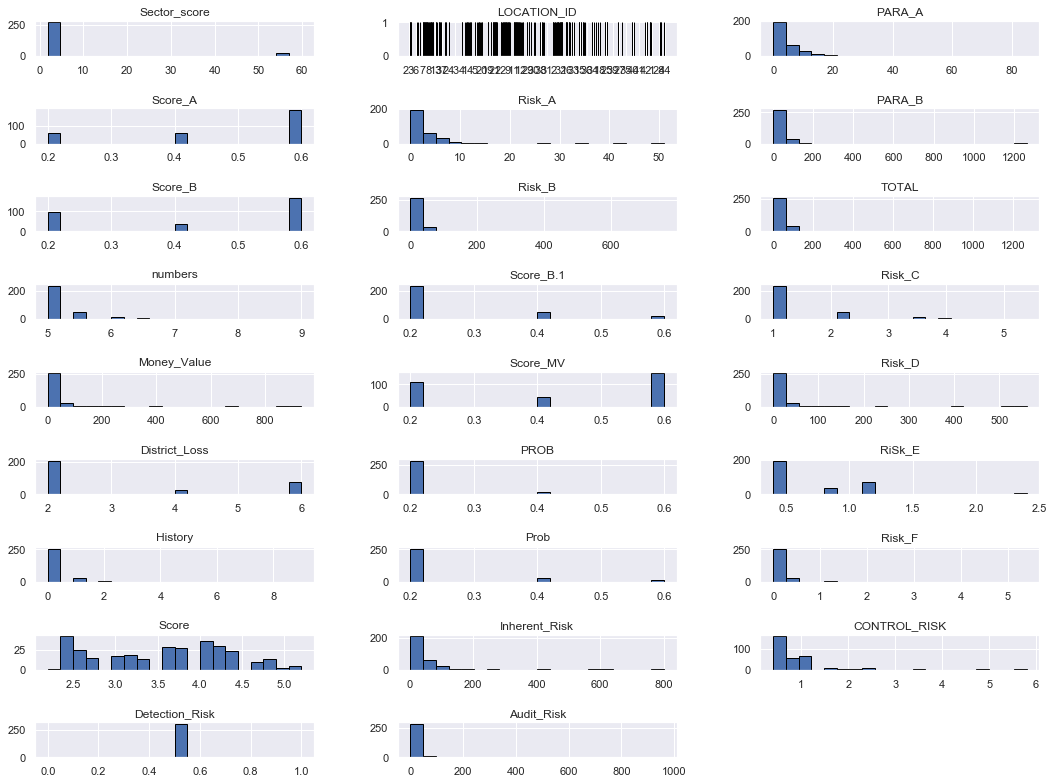

In [68]:
df1=dataset[dataset['Risk']==1]
columns=df1.columns[:26]
plt.subplots(figsize=(18,20))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.3,hspace=1.5)
    df1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [51]:
#dataset = dataset.drop(['LOCATION_ID','TOTAL'],axis=1)
#number_of_rows, number_of_columns = dataset.shape
#print("Number of Rows :",number_of_rows) 
#print("Number of Columns :",number_of_columns) 

### CORRELATION MATRIX WITH HEATMAP

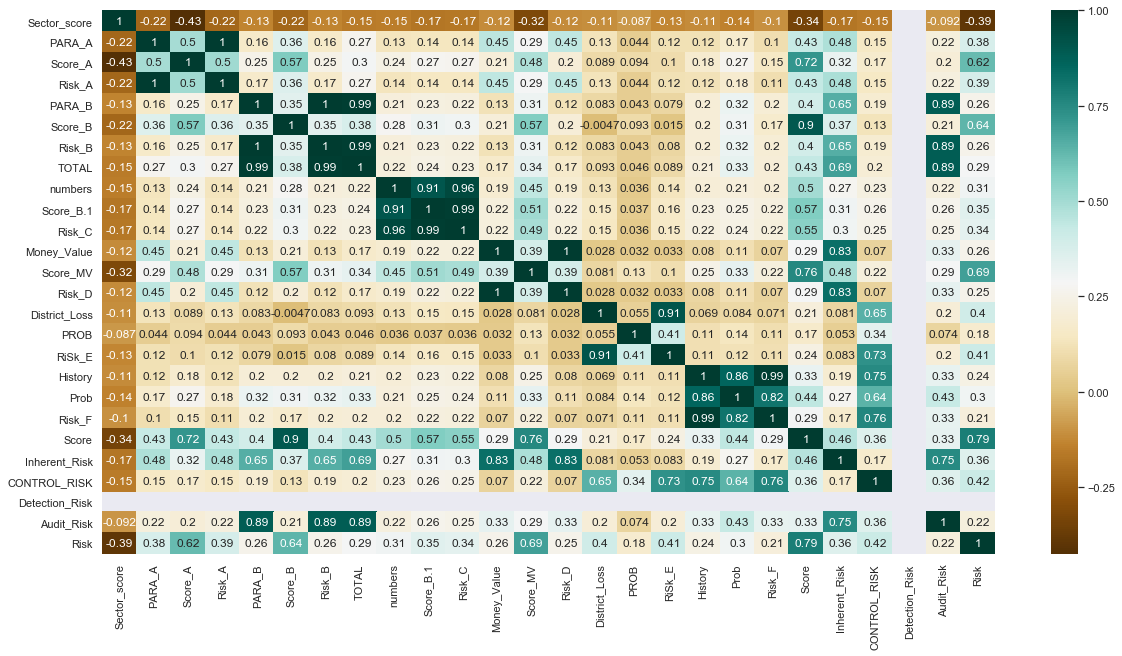

In [69]:
#TO FIND CORRELATIONS BETWEEN THE FEATURES AND THE CLASS VARIABLE

plt.figure(figsize=(20,10))
c= dataset.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [81]:
#dataset = dataset.drop(['LOCATION_ID','TOTAL','Detection_Risk'], axis=1)
number_of_rows, number_of_columns = dataset.shape
print("Number of Rows :",number_of_rows) 
print("Number of Columns :",number_of_columns)

Number of Rows : 776
Number of Columns : 24


In [82]:
#SEPARATING CLASS TARGET VARIABLE FROM PREDICTORS
X = dataset.drop(['Risk'],axis=1)
Y = dataset['Risk']

In [85]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(23,'Score'))

          Feature         Score
20  Inherent_Risk  16741.842416
10    Money_Value  16027.787634
4          PARA_B  11891.455678
12         Risk_D   9691.739636
22     Audit_Risk   7620.032223
6          Risk_B   7211.515627
0    Sector_score   3527.409851
1          PARA_A   1463.349573
3          Risk_A   1006.789120
19          Score    130.698793
16        History    120.048472
13  District_Loss     76.153288
18         Risk_F     62.222024
21   CONTROL_RISK     46.394550
11       Score_MV     32.205915
5         Score_B     28.843732
2         Score_A     25.668998
9          Risk_C     22.725721
15         RiSk_E     21.339460
8       Score_B.1      2.799796
17           Prob      1.473947
7         numbers      1.015491
14           PROB      0.165503


In [88]:
dataset = dataset.drop(['Score_B.1','Prob','numbers','PROB'], axis=1)
number_of_rows, number_of_columns = dataset.shape
print("Number of Rows :",number_of_rows) 
print("Number of Columns :",number_of_columns)

Number of Rows : 776
Number of Columns : 20


### SPLITTING DATA INTO TRAINING, VALIDATION AND TEST DATA

In [110]:
#SPLITTING ORIGINAL DATA INTO TRAINING AND TEST DATA
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=42)

#SPLITTING THE 40% TEST DATA INTO 20% VALIDATION DATA AND 20% ACTUAL TEST DATA
X_val, X_test, Y_val, Y_test = train_test_split(X_test,Y_test, test_size=0.5, random_state=42)

In [111]:
#CHECKING TO CONFIRM THE PERCENTAGES OF EACH OF THE DATA SET
print ('Number of Rows and Columns in Training Data for Predictors',X_train.shape)
print ('Number of Rows and Columns in Validation Data for Predictors',X_val.shape)
print ('Number of Rows and Columns in Testing Data for Predictors',X_test.shape)
print('----------------------------------------------------------------------')
print ('Number of Rows in Training Data for Target Variable',Y_train.shape)
print ('Number of Rows in Validation Data for Target Variable',Y_val.shape)
print ('Number of Rows in Testing Data for Target Variable',Y_test.shape)

Number of Rows and Columns in Training Data for Predictors (465, 23)
Number of Rows and Columns in Validation Data for Predictors (155, 23)
Number of Rows and Columns in Testing Data for Predictors (156, 23)
----------------------------------------------------------------------
Number of Rows in Training Data for Target Variable (465,)
Number of Rows in Validation Data for Target Variable (155,)
Number of Rows in Testing Data for Target Variable (156,)


### MODEL BUILDING

In [112]:
clf1 = SVC()
clf1.fit(X_train,Y_train)

C:\Users\edmun\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [113]:
ypred = clf1.predict(X_val)
print ("accuracy:", metrics.accuracy_score(Y_val,ypred))

accuracy: 0.9870967741935484


In [114]:
clf1 = SVC(kernel='linear')
clf1.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [115]:
ypred = clf1.predict(X_val)
print ("accuracy:", metrics.accuracy_score(Y_val,ypred))

accuracy: 0.9935483870967742


In [119]:
from sklearn.model_selection import RandomizedSearchCV
import time

gamma = [0.1,1,10,100]
C = [0.1,1,10,100]
degree = [0,1,2,3,4,5,6]
kernel = ['rbf','linear','poly']

param_grid = dict(gamma=gamma, C=C, degree=degree, kernel=kernel)



# Grid search 
grid = RandomizedSearchCV(estimator=clf1, 
                          param_distributions = param_grid,
                          n_iter = 50,
                          cv = 2,
                          verbose=2,
                          random_state=42,
                          n_jobs = -1,
                          scoring = 'roc_auc') #no job to run in parallel, -1 means using all processor

start_time = time.time()
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.1s


Best: 0.999464 using {'kernel': 'linear', 'gamma': 100, 'degree': 0, 'C': 1}
Execution time: 14.822997570037842 ms


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.7s finished


### TESTING RESULTS

In [121]:
clf1 = SVC(kernel='linear',gamma=100,degree=0,C=1)
clf1.fit(X_train,Y_train)
y_test_pred = clf1.predict(X_test)
print ("Accuracy Score:", metrics.accuracy_score(Y_test,y_test_pred))

Accuracy Score: 1.0


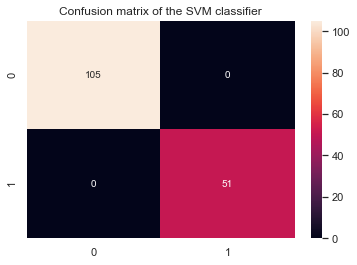

In [124]:
cm_logi = confusion_matrix(Y_test, y_test_pred)
plt.title('Confusion matrix of the SVM classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

### DISCUSSION

In [126]:
### LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()
logi.fit(X_train, Y_train)

C:\Users\edmun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
log_pred = clf1.predict(X_val)
print ("Accuracy Score:", metrics.accuracy_score(Y_val,log_pred))

Accuracy Score: 0.9935483870967742


In [128]:
log_pred = clf1.predict(X_test)
print ("Accuracy Score:", metrics.accuracy_score(Y_test,log_pred))

Accuracy Score: 1.0


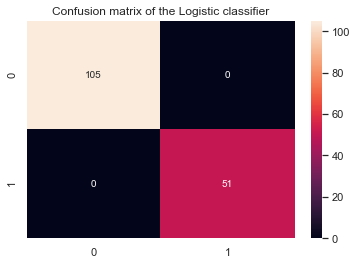

In [129]:
cm_log = confusion_matrix(Y_test, log_pred)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_log,annot=True,fmt="d")
plt.show()